In [1]:
import pandas as pd
import re as re

In [2]:
f1=pd.read_csv("C:\\Users\\tarun\\OneDrive\\Desktop\\intern datasets\\threads1.csv")

In [3]:
f2=pd.read_csv("C:\\Users\\tarun\\OneDrive\\Desktop\\intern datasets\\Incident.csv")

In [4]:
f1.head(2)

,Foreign Key,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
0,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer
1,2632,2809,No Value,No Value,05/11/2010 09:50,1983,CSS Web,No Value,1,5,Agents are experiencing an issue with Rightnow...,Customer


In [5]:
f2.head(2)

,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,Category ID
0,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value
1,101004-000000,2601,Adam Wilkinson,No Value,Solved,Solved,Measuring effectiveness increases effectiveness,No Value,29,11/01/2011 12:07,04/10/2010 09:22,402,No Value


In [6]:
f1.rename(columns={'Foreign Key':'Incident ID'}, inplace=True)

In [7]:
f3=f1[["Incident ID","Text"]].merge(f2[["Incident ID","Status","Product ID"]],on="Incident ID",how="left")

In [8]:
f3.head(2)

,Incident ID,Text,Status,Product ID
0,2601,\n\n==================== text File Attachment ...,Solved,No Value
1,2632,Agents are experiencing an issue with Rightnow...,Solved,Instance Freezing


In [9]:
f3.shape

(100000, 4)

In [10]:
f3.head(30)

,Incident ID,Text,Status,Product ID
0,2601,\n\n==================== text File Attachment ...,Solved,No Value
1,2632,Agents are experiencing an issue with Rightnow...,Solved,Instance Freezing
2,2601,"Ad, see the attachment.",Solved,No Value
3,2655,the phone display states \nNo service\nTrying ...,Solved,Other
4,2655,"Had a look, appears to be a network port issue...",Solved,Other
5,2666,I have come into work this evening to find tha...,Solved,Other
6,2666,"Hi Paddy,\n\nI've called you a number of times...",Solved,Other
7,2666,"Hi Steve, It’s all been sorted out with Alan’s...",Solved,Other
8,2666,I have talked Paddy through setting up Rightno...,Solved,Other
9,2669,"Hiya, Can you re-install BTB Right now for me ...",Solved,Other


In [11]:
f3=f3[f3['Product ID']!='No Value']

In [12]:
f3.shape

(98083, 4)

In [13]:
f3.head(10)

,Incident ID,Text,Status,Product ID
1,2632,Agents are experiencing an issue with Rightnow...,Solved,Instance Freezing
3,2655,the phone display states \nNo service\nTrying ...,Solved,Other
4,2655,"Had a look, appears to be a network port issue...",Solved,Other
5,2666,I have come into work this evening to find tha...,Solved,Other
6,2666,"Hi Paddy,\n\nI've called you a number of times...",Solved,Other
7,2666,"Hi Steve, It’s all been sorted out with Alan’s...",Solved,Other
8,2666,I have talked Paddy through setting up Rightno...,Solved,Other
9,2669,"Hiya, Can you re-install BTB Right now for me ...",Solved,Other
10,2669,"Hi Kinga,\n\nyou can install BTB yourself by g...",Solved,Other
11,2670,I am still unable to hear voicemails on this l...,Solved,Other


In [14]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

In [15]:
f3["Text"]=f3["Text"].apply(lambda cw: remove_tags(cw))

In [16]:
f3.head(2)

,Incident ID,Text,Status,Product ID
1,2632,Agents are experiencing an issue with Rightnow...,Solved,Instance Freezing
3,2655,the phone display states \nNo service\nTrying ...,Solved,Other


In [17]:
f3['Text']=f3['Text'].str.replace('\n','')

In [18]:
f3.head(2)

,Incident ID,Text,Status,Product ID
1,2632,Agents are experiencing an issue with Rightnow...,Solved,Instance Freezing
3,2655,the phone display states No serviceTrying 10.1...,Solved,Other


In [19]:
f3.shape

(98083, 4)

In [20]:
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [21]:
f3['pro_id'] = f3['Product ID'].factorize()[0]
category_id_f2 = f3[['Product ID', 'pro_id']].drop_duplicates()

pro_to_id = dict(category_id_f2.values)
id_to_category = dict(category_id_f2[['pro_id', 'Product ID']].values)

In [22]:
f3.head(10)

,Incident ID,Text,Status,Product ID,pro_id
1,2632,Agents are experiencing an issue with Rightnow...,Solved,Instance Freezing,0
3,2655,the phone display states No serviceTrying 10.1...,Solved,Other,1
4,2655,"Had a look, appears to be a network port issue...",Solved,Other,1
5,2666,I have come into work this evening to find tha...,Solved,Other,1
6,2666,"Hi Paddy,I've called you a number of times on ...",Solved,Other,1
7,2666,"Hi Steve, It’s all been sorted out with Alan’s...",Solved,Other,1
8,2666,I have talked Paddy through setting up Rightno...,Solved,Other,1
9,2669,"Hiya, Can you re-install BTB Right now for me ...",Solved,Other,1
10,2669,"Hi Kinga,you can install BTB yourself by going...",Solved,Other,1
11,2670,I am still unable to hear voicemails on this l...,Solved,Other,1


In [23]:
f3.shape

(98083, 5)

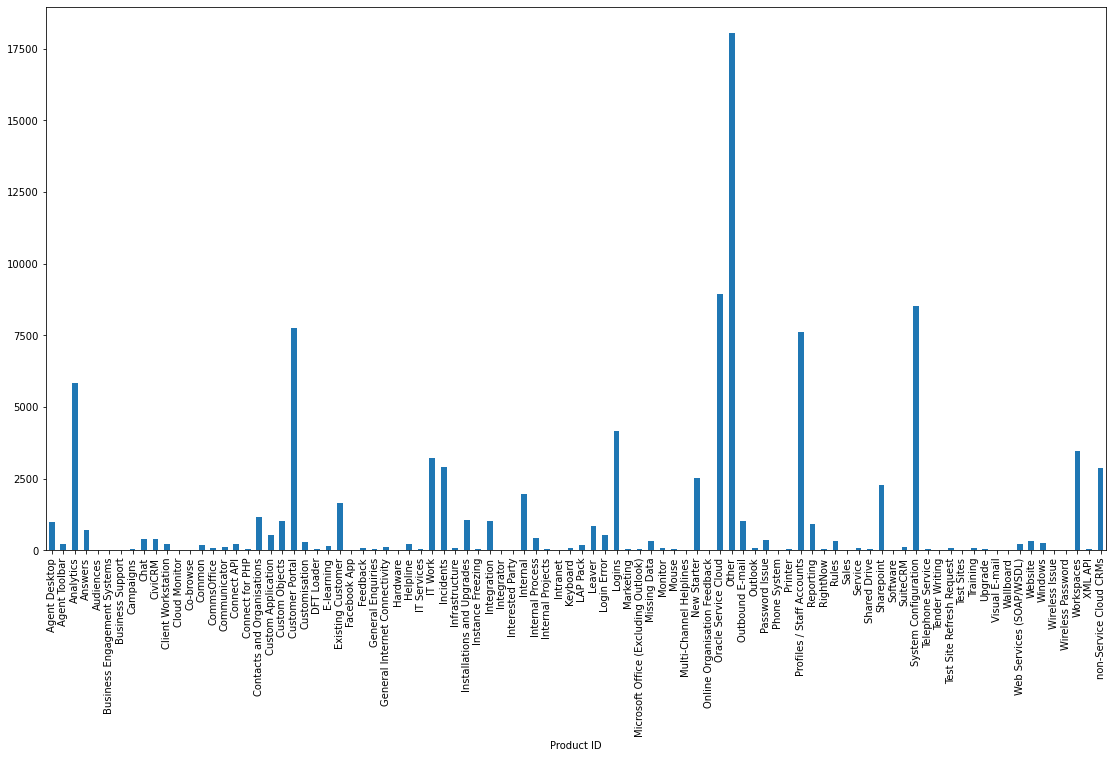

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(19,10))
f3.groupby('Product ID').Text.count().plot.bar(ylim=0)
plt.show()

In [26]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(f3.Text)
labels = f3.pro_id
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 98083 complaints is represented by 87697 features (TF-IDF score of unigrams and bigrams)


In [27]:
N = 3
for ProductID, pro_id in sorted(pro_to_id.items()):
    features_chi2 = chi2(features, labels == pro_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(ProductID))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Agent Desktop:
  * Most Correlated Unigrams are: 032926, reject, chat
  * Most Correlated Bigrams are: auto accept, pop survey, accept reject

==> Agent Toolbar:
  * Most Correlated Unigrams are: toolbar, 110818, shoretel
  * Most Correlated Bigrams are: resolved resolution, resolution place, shoretel agent

==> Analytics:
  * Most Correlated Unigrams are: schedule, reports, report
  * Most Correlated Bigrams are: anthony nbsp, sla report, dear barbara

==> Answers:
  * Most Correlated Unigrams are: harriet, answers, bea
  * Most Correlated Bigrams are: answers count, archive option, hi bea

==> Audiences:
  * Most Correlated Unigrams are: claudia, segments, wave
  * Most Correlated Bigrams are: say chat, happy looks, assigned satheesh

==> Business Engagement Systems:
  * Most Correlated Unigrams are: visitor, brocwing, sessional
  * Most Correlated Bigrams are: course pages, meets following, pre sessional

==> Business Support:
  * Most Correlated Unigrams are: lees, terminal, s


==> Monitor:
  * Most Correlated Unigrams are: monitor, luc, han
  * Most Correlated Bigrams are: look think, main screen, welcome screen

==> Mouse:
  * Most Correlated Unigrams are: ally, mice, mouse
  * Most Correlated Bigrams are: spoken person, gone missing, new mouse

==> Multi-Channel Helplines:
  * Most Correlated Unigrams are: complexity, matters, season
  * Most Correlated Bigrams are: meet complexity, want set, new helpline

==> New Starter:
  * Most Correlated Unigrams are: westgate, asset, starter
  * Most Correlated Bigrams are: starting migrant, starter form, new starter

==> Online Organisation Feedback:
  * Most Correlated Unigrams are: attached, customer, weekly
  * Most Correlated Bigrams are: sent customer, update sent, weekly update

==> Oracle Service Cloud:
  * Most Correlated Unigrams are: 03303330814, seagravelevel, craig
  * Most Correlated Bigrams are: seagravelevel support, craig seagravelevel, engineert 03303330814

==> Other:
  * Most Correlated Unigrams 

In [28]:
X=f3['Text']
y=f3['Product ID']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state = 0)

In [30]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\s

In [31]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.234455,0.044556
LogisticRegression,0.265669,0.030233
MultinomialNB,0.217326,0.014788
RandomForestClassifier,0.189503,0.004658


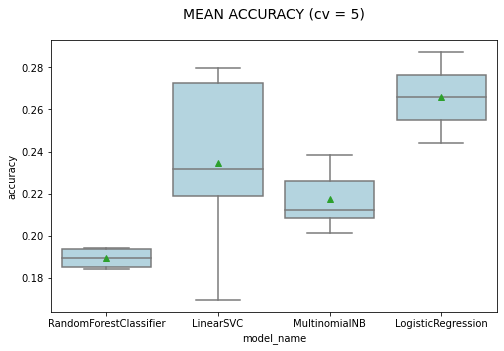

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [33]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               f3.index, test_size=0.25, 
                                                               random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.36      0.69      0.47      4491
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        69
           6       0.59      0.13      0.21        78
           7       0.00      0.00      0.00        21
           8       0.00      0.00      0.00        91
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        47
          12       0.00      0.00      0.00        10
          13       0.67      0.03      0.06       119
          14       0.78      0.14      0.23       153
          15       0.00      0.00      0.00         8
          16       0.46      0.54      0.50      190

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LogisticRegression().fit(tfidf_vectorizer_vectors, y_train)

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
new_complaint = """Good morning,I have been locked out of my Right Now account, please can you assist?Many thanksHelenHelen TesterWellbeing CoordinatorPharmacist Support5th Floor196 DeansgateManchesterM3 3WFDirect: 0161 441 0811Enquiry Line: 0808 168 2233Website: www.pharmacistsupport.org<http://www.pharmacistsupport.org/>NEW Charity Number:Pharmacist Support is a charitable company limited by guarantee registered in England and Wales with company number 9237609 and charity number 1158974."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Profiles / Staff Accounts']


In [37]:
import pickle

In [41]:
with open('product_model','wb') as f:
    pickle.dump(model,f)

In [42]:
with open('product_model','rb') as f:
    ml=pickle.load(f)

In [47]:
ml.predict(fitted_vectorizer.transform(["""Good morning,I have been locked out of my Right Now account"""]))

array(['Logins'], dtype=object)